In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import os
import sys
import fitsio
import numpy             as np
import pylab             as pl
import matplotlib.pyplot as plt
import astropy.io.fits   as fits

In [20]:
sys.path.append('{}/DESI'.format(os.environ['HOME']))

In [21]:
import pubplot

from schechter     import schechter, named_schechter
from gama_limits   import gama_field
from delta8_limits import d8_limits, delta8_tier
from findfile      import findfile, fetch_fields
from lumfn         import multifield_lumfn
from astropy.table import Table

In [22]:
version = 'GAMA4'
survey  = 'gama'
field   = 'G12'
dryrun  = False

In [7]:
fields  = fetch_fields(survey)

In [8]:
# TODO: clean up root below in LF cells
root    = '{}/data/GAMA4/'.format(os.environ['HOME'])
fpath   =  findfile(ftype='ddp_n8', version=version, dryrun=dryrun, survey=survey)
fpath

'/cosma/home/durham/dc-moor2/data/GAMA4/gama_gold_ddp_n8.fits'

In [9]:
fpath   = findfile(ftype='randoms_bd_ddp_n8', field=field, version=version, dryrun=dryrun, survey=survey)
randoms = Table.read(fpath)

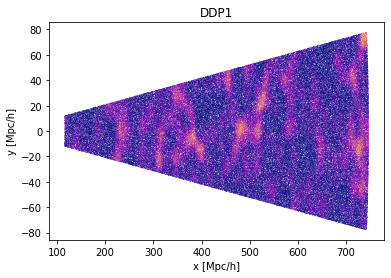

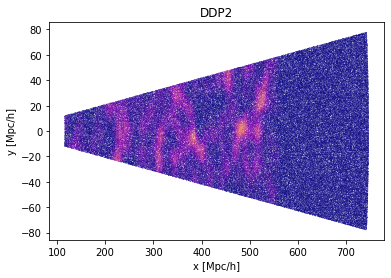

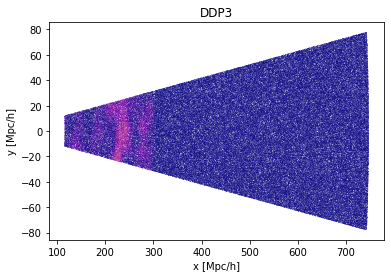

In [10]:
randoms_slice = randoms[np.abs(randoms['ROTCARTESIAN_Z']) < 5.]

for idx in np.arange(1, 4, 1):
    plt.scatter(randoms_slice['ROTCARTESIAN_X'],\
                randoms_slice['ROTCARTESIAN_Y'],\
                c=randoms_slice['DDP{}_DELTA8'.format(idx)],\
                marker='.',\
                lw=0.0,\
                s=1,\
                vmin=-1.,\
                vmax=10.,\
                cmap='plasma')

    pl.xlabel('x [Mpc/h]')
    pl.ylabel('y [Mpc/h]')
    
    plt.title('DDP{}'.format(idx))
    plt.show()

/tmp/ipykernel_74874/1454911877.py:17: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', marker='.', lw=0.0, c=colors[i], markersize=6)
/tmp/ipykernel_74874/1454911877.py:17: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', marker='.', lw=0.0, c=colors[i], markersize=6)
/tmp/ipykernel_74874/1454911877.py:17: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', marker='.', lw=0.0, c=colors[i], markersize=6)
/tmp/ipykernel_74874/1454911877.py:17: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', marker='.', lw=0.0, c=colors[i], markersize=6)
/tmp/ipykernel_74874/1454911877.py:17: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', marker='.', lw=0.0, c=colors[i], markersiz

Text(0.5, 1.0, 'G9/12/15')

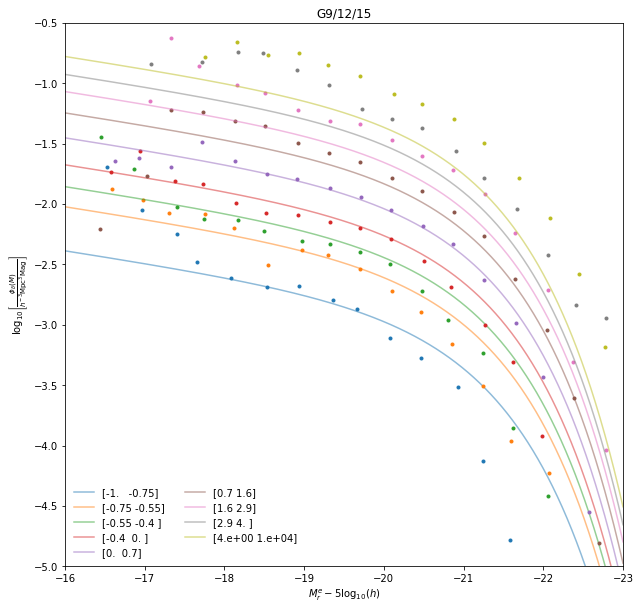

In [11]:
colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ax   = plt.subplots(1, 1, figsize=(10,10))

for i in np.arange(0, 9, 1):
    lfs   = [findfile(ftype='ddp_n8_d0_lumfn', survey=survey, field=field, version=version, utier=i)]
    lf    = multifield_lumfn(lfs, ext='LUMFN')

    ddp   = Table.read(findfile(ftype='ddp_n8_d0', survey=survey, field=field, version=version, utier=i))

    refs  = [findfile(ftype='ddp_n8_d0_lumfn', survey=survey, field=field, version=version, utier=i)]
    ref   = multifield_lumfn(refs, ext='REFERENCE')

    label = ddp.meta['D8{}LIMS'.format(i)]

    ax.plot(ref['MS'], np.log10(ref['REFSCHECHTER'.format(i)]), label=label, alpha=0.5, c=colors[i])
    ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', marker='.', lw=0.0, c=colors[i], markersize=6)
    
ax.set_xlabel(r'$M_r^e - 5 \log_{10}(h)$')
ax.set_ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{h^{-3} {\rm Mpc}^{3} {\rm Mag}^{}} \right] $')

ax.set_xlim(-16., -23.0)
ax.set_ylim(-5, -0.5)

ax.legend(frameon=False, loc=3, ncol=2, fontsize=10)
ax.set_title('G9/12/15')

/tmp/ipykernel_74874/4157309795.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', lw=2.0, c=colors[i])
/tmp/ipykernel_74874/4157309795.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', lw=2.0, c=colors[i])
/tmp/ipykernel_74874/4157309795.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', lw=2.0, c=colors[i])
/tmp/ipykernel_74874/4157309795.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', lw=2.0, c=colors[i])
/tmp/ipykernel_74874/4157309795.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', lw=2.0, c=colors[i])
/tmp/ipykernel_74874/4157309795.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10

Text(0.5, 1.0, 'G9/12/15')

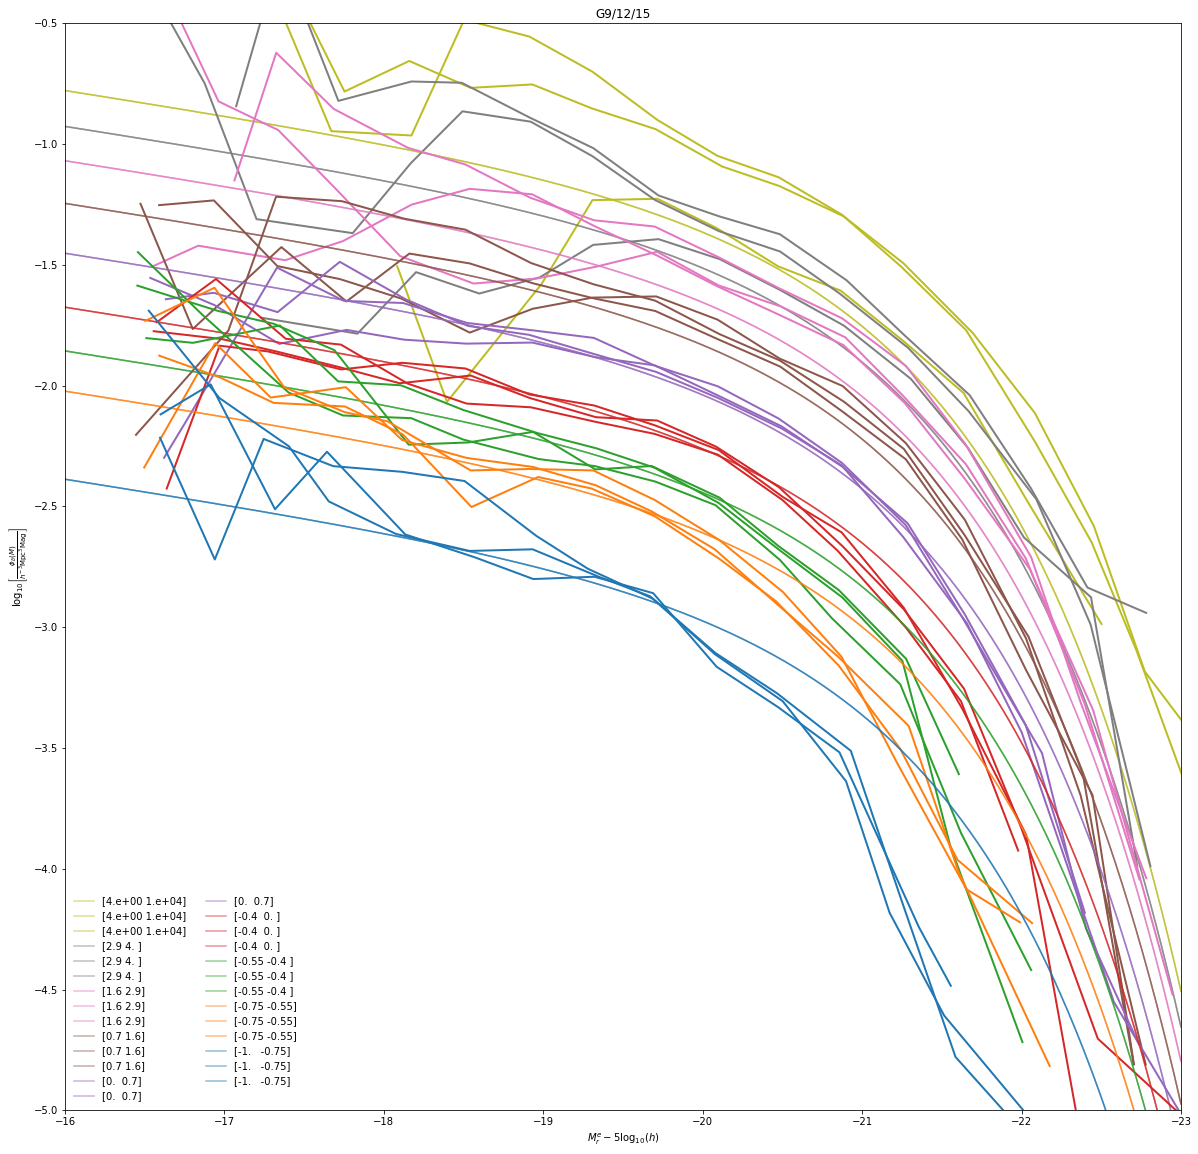

In [12]:
colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ax   = plt.subplots(1, 1, figsize=(20,20))

for i in np.arange(0, 9, 1)[::-1]:
    for field in fields:
        lf  = Table.read(findfile(ftype='ddp_n8_d0_lumfn', survey=survey, field=field, version=version, utier=i), 'LUMFN')
        ddp = Table.read(findfile(ftype='ddp_n8_d0', survey=survey, field=field, version=version, utier=i), 'DDP')

        ref = Table.read(findfile(ftype='ddp_n8_d0_lumfn', survey=survey, field=field, version=version, utier=i), 'REFERENCE')

        label = ddp.meta['D8{}LIMS'.format(i)]

        ax.plot(ref['MS'], np.log10(ref['REFSCHECHTER'.format(i)]), label=label, alpha=0.5, c=colors[i])
        ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', lw=2.0, c=colors[i])
    
ax.set_xlabel(r'$M_r^e - 5 \log_{10}(h)$')
ax.set_ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{h^{-3} {\rm Mpc}^{3} {\rm Mag}^{}} \right] $')

ax.set_xlim(-16., -23.0)
ax.set_ylim(-5, -0.5)

ax.legend(frameon=False, loc=3, ncol=2, fontsize=10)
ax.set_title('G9/12/15')

/tmp/ipykernel_74874/1582905288.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_74874/1582905288.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_74874/1582905288.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_74874/1582905288.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_74874/1582905288.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_74874/1582905288.py:16: R

Text(0.5, 1.0, 'G9/12/15')

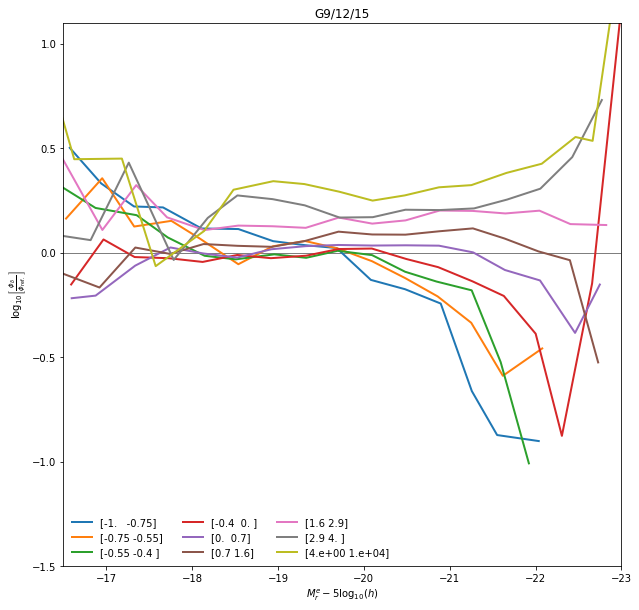

In [13]:
colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ax   = plt.subplots(1, 1, figsize=(10,10))

ax.axhline(0.0, lw=0.5, c='k')

for i in np.arange(0, 9, 1):
    lfs   = [findfile(ftype='ddp_n8_d0_lumfn', survey=survey, field=field, version=version, utier=i) for field in fields]
    lf    = multifield_lumfn(lfs, ext='LUMFN', weight=None)

    ddp   = Table.read(findfile(ftype='ddp_n8_d0', survey=survey, field=field, version=version, utier=i))
    ref   = Table.read(findfile(ftype='ddp_n8_d0_lumfn', survey=survey, field=field, version=version, utier=i), 'REFERENCE')

    label = ddp.meta['D8{}LIMS'.format(i)]

    ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
    
ax.set_xlabel(r'$M_r^e - 5 \log_{10}(h)$')
ax.set_ylabel(r'$\log_{10} \left[ \frac{\phi_\delta}{\phi_{\rm ref.}} \right] $')

ax.set_xlim(-16.5, -23.0)
ax.set_ylim(-1.5,    1.1)

ax.legend(frameon=False, loc=3, ncol=3, fontsize=10)
ax.set_title('G9/12/15')

/tmp/ipykernel_74874/1582905288.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_74874/1582905288.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_74874/1582905288.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_74874/1582905288.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_74874/1582905288.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_74874/1582905288.py:16: R

Text(0.5, 1.0, 'G9/12/15')

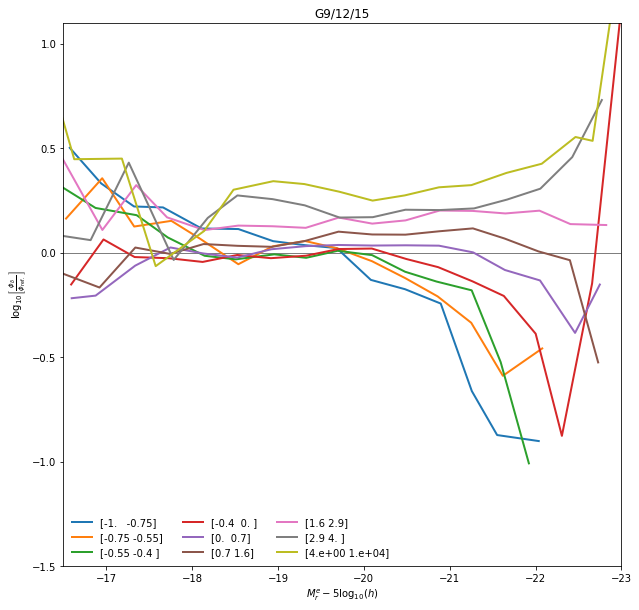

In [14]:
colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ax   = plt.subplots(1, 1, figsize=(10,10))

ax.axhline(0.0, lw=0.5, c='k')

for i in np.arange(0, 9, 1):
    lfs   = [findfile(ftype='ddp_n8_d0_lumfn', survey=survey, field=field, version=version, utier=i) for field in fields]
    lf    = multifield_lumfn(lfs, ext='LUMFN', weight=None)

    ddp   = Table.read(findfile(ftype='ddp_n8_d0', survey=survey, field=field, version=version, utier=i))
    ref   = Table.read(findfile(ftype='ddp_n8_d0_lumfn', survey=survey, field=field, version=version, utier=i), 'REFERENCE')

    label = ddp.meta['D8{}LIMS'.format(i)]

    ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
    
ax.set_xlabel(r'$M_r^e - 5 \log_{10}(h)$')
ax.set_ylabel(r'$\log_{10} \left[ \frac{\phi_\delta}{\phi_{\rm ref.}} \right] $')

ax.set_xlim(-16.5, -23.0)
ax.set_ylim(-1.5,    1.1)

ax.legend(frameon=False, loc=3, ncol=3, fontsize=10)
ax.set_title('G9/12/15')

/tmp/ipykernel_74874/1458464949.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_74874/1458464949.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_74874/1458464949.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_74874/1458464949.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_74874/1458464949.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_74874/1458464949.py:16: R

Text(0.5, 1.0, 'G9/12/15')

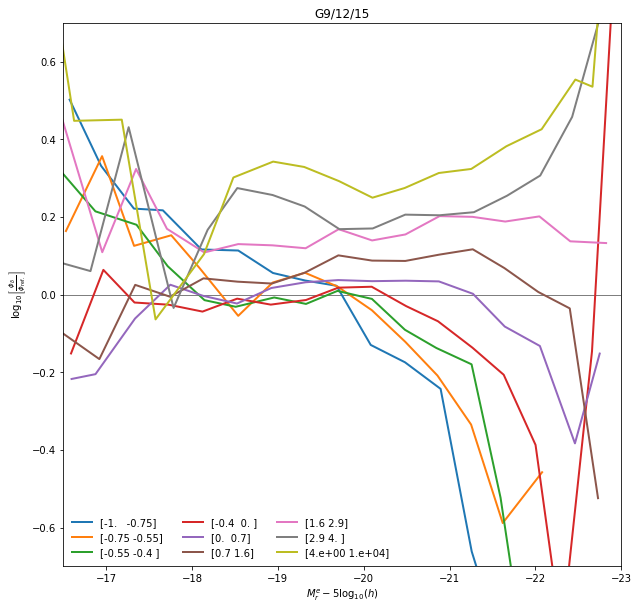

In [15]:
colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ax   = plt.subplots(1, 1, figsize=(10,10))

ax.axhline(0.0, lw=0.5, c='k')

for i in np.arange(0, 9, 1):
    lfs   = [findfile(ftype='ddp_n8_d0_lumfn', survey=survey, field=field, version=version, utier=i) for field in fields]
    lf    = multifield_lumfn(lfs, ext='LUMFN', weight=None)

    ddp   = Table.read(findfile(ftype='ddp_n8_d0', survey=survey, field=field, version=version, utier=i))
    ref   = Table.read(findfile(ftype='ddp_n8_d0_lumfn', survey=survey, field=field, version=version, utier=i), 'REFERENCE')

    label = ddp.meta['D8{}LIMS'.format(i)]

    ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
    
ax.set_xlabel(r'$M_r^e - 5 \log_{10}(h)$')
ax.set_ylabel(r'$\log_{10} \left[ \frac{\phi_\delta}{\phi_{\rm ref.}} \right] $')

ax.set_xlim(-16.5, -23.0)
ax.set_ylim(-0.7,    0.7)

ax.legend(frameon=False, loc=3, ncol=3, fontsize=10)
ax.set_title('G9/12/15')

# Done.

/tmp/ipykernel_74874/942999348.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_74874/942999348.py:17: RuntimeWarning: divide by zero encountered in log10
  ax.errorbar(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), yerr=np.log10(lf['PHI_IVMAX_ERROR'])/45, label=label, lw=2.0, c=colors[i], markersize=4)
/cosma/home/durham/dc-moor2/.local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/tmp/ipykernel_74874/942999348.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_74874/942999348.py:17: RuntimeWarning: divide by zero encountered in log10
  ax.errorbar(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), yerr=np.log10(lf['PHI_IV

Text(0.5, 1.0, 'G9/12/15')

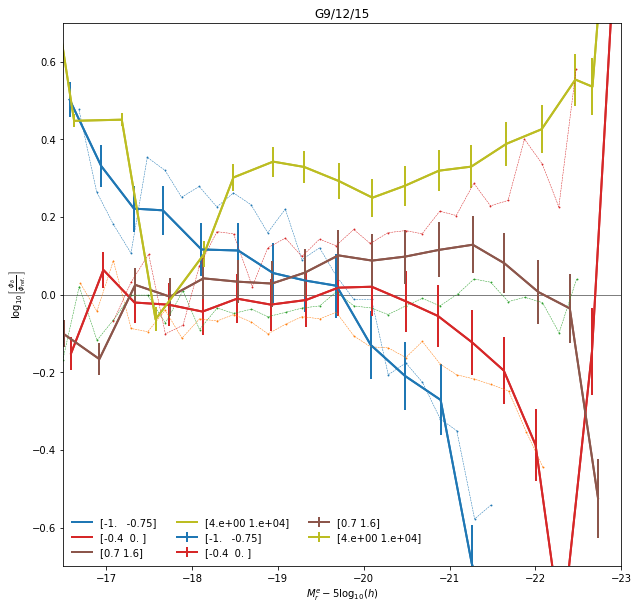

In [34]:
colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ax   = plt.subplots(1, 1, figsize=(10,10))

ax.axhline(0.0, lw=0.5, c='k')

for i in [0, 3, 5, 8]:
    lfs   = [findfile(ftype='ddp_n8_d0_lumfn', survey=survey, field=field, version=version, utier=i) for field in fields]
    lf    = multifield_lumfn(lfs, ext='LUMFN', weight=None)

    ddp   = Table.read(findfile(ftype='ddp_n8_d0', survey=survey, field=field, version=version, utier=i))
    ref   = Table.read(findfile(ftype='ddp_n8_d0_lumfn', survey=survey, field=field, version=version, utier=i), 'REFERENCE')

    label = ddp.meta['D8{}LIMS'.format(i)]

    ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
    ax.errorbar(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), yerr=np.log10(lf['PHI_IVMAX_ERROR'])/45, label=label, lw=2.0, c=colors[i], markersize=4)
    
    
    # TODO: add to folder and push!
    fpath = '/cosma/home/durham/dc-moor2/DESI/data/TMR_d{}_ratio.fits'.format(i)
    lf_TMR = Table.read(fpath)
    lf_TMR = np.sort(lf_TMR)
    plt.scatter(lf_TMR['MS'], lf_TMR['PHI'], s=0.75)
    plt.plot(lf_TMR['MS'], lf_TMR['PHI'], ls='--', lw=0.5)
    
ax.set_xlabel(r'$M_r^e - 5 \log_{10}(h)$')
ax.set_ylabel(r'$\log_{10} \left[ \frac{\phi_\delta}{\phi_{\rm ref.}} \right] $')

ax.set_xlim(-16.5, -23.0)
ax.set_ylim(-0.7,    0.7)

ax.legend(frameon=False, loc=3, ncol=3, fontsize=10)
ax.set_title('G9/12/15')

In [29]:
lf

MEDIAN_M,PHI_N,PHI_IVMAX,V_ON_VMAX,REF_SCHECHTER,REF_RATIO,N,PHI_N_ERROR,PHI_IVMAX_ERROR
float64,float64,float64,float64,float64,float64,float64,float64,float64
-25.3,0.0,0.0,0.0,1.1851904007025605e-27,0.0,0.0,0.0,0.0
-24.900000000000002,0.0,0.0,0.0,7.700396779807222e-20,0.0,0.0,0.0,0.0
-24.500000000000004,0.0,0.0,0.0,2.0133763932660333e-14,0.0,0.0,0.0,0.0
-24.100000000000005,0.0,0.0,0.0,1.1592711986788505e-10,0.0,0.0,0.0,0.0
-23.700000000000006,0.0,0.0,0.0,4.7640486227177483e-08,0.0,0.0,0.0,0.0
-23.300000000000008,0.0,0.0,0.0,3.1521335395346015e-06,0.0,0.0,0.0,0.0
-23.156369955397086,8.384880305868924e-05,0.00010807732976287987,0.5172148697767441,2.4767087028311775e-05,82.06654674471235,2.0,0.0001778797763306435,0.0002292790182249598
-22.66449274325549,0.00037688392511680364,0.00048578640089432033,0.5172148697767441,0.00024825647359868433,3.430505767540017,9.0,0.00037690407132218563,0.00048581236844547326
-22.464891340236274,0.0015252559283418113,0.001965986179013232,0.7758223046651161,0.0005360774293958092,3.579091588928383,36.0,0.0007628441096762383,0.0009832716913256577
